In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import biomodels_1805160001
from stochastic_tests import Test

t_fin = 1200.0
num_steps = 1200

test = Test(model=biomodels_1805160001(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=True)

In [2]:
test.execute_deterministic()
# _ = test.plot_results_deterministic()  # Too many variables

Stochastic simulation results can be treated as a distribution with statistical properties such as mean and standard deviation. Distributions should become smooth with increasing number of trials. 

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

In [4]:
# _ = test.plot_results_stochastic(False)  # Too many variables

In [5]:
# _ = test.plot_stats()

If we bin replicate results at each sample time, we should find that the probability distribution function of a variable at each time point converges with increasing number of replicates. 

In [6]:
# _ = test.plot_distributions()  # Too many variables

Results distributions should converge as the number of trials increases. At any sampled simulation time, convergence appears as a distribution that converges with increasing number of trials. Convergence can be quantified by measuring the change in distribution for an increase in number of trials. We should find that the change in distribution goes to zero everywhere as the number of trials increases. 

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()
# test.plot_ecf()  # Too many variables
# test.plot_ecf_diffs()  # Too many variables
# _ = test.plot_ecf_comparison()  # Too many variables

In [8]:
test.generate_ecf_diff_fits()

/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:992: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


In [9]:
# _, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())  # Too many variables
# _ = axs[0].legend()  # Too many variables

In [10]:
out = ipw.Output()
display(out)

for var_name in test.model.results_names:
    with out:
        print('Variable:', var_name)
    for trial, name_data in test.ecf_diff.items():
        with out:
            print(f'\tTrials {trial} ; K-S stat: {name_data[var_name]}')

Output()

In [11]:
# Runtime: ~188 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

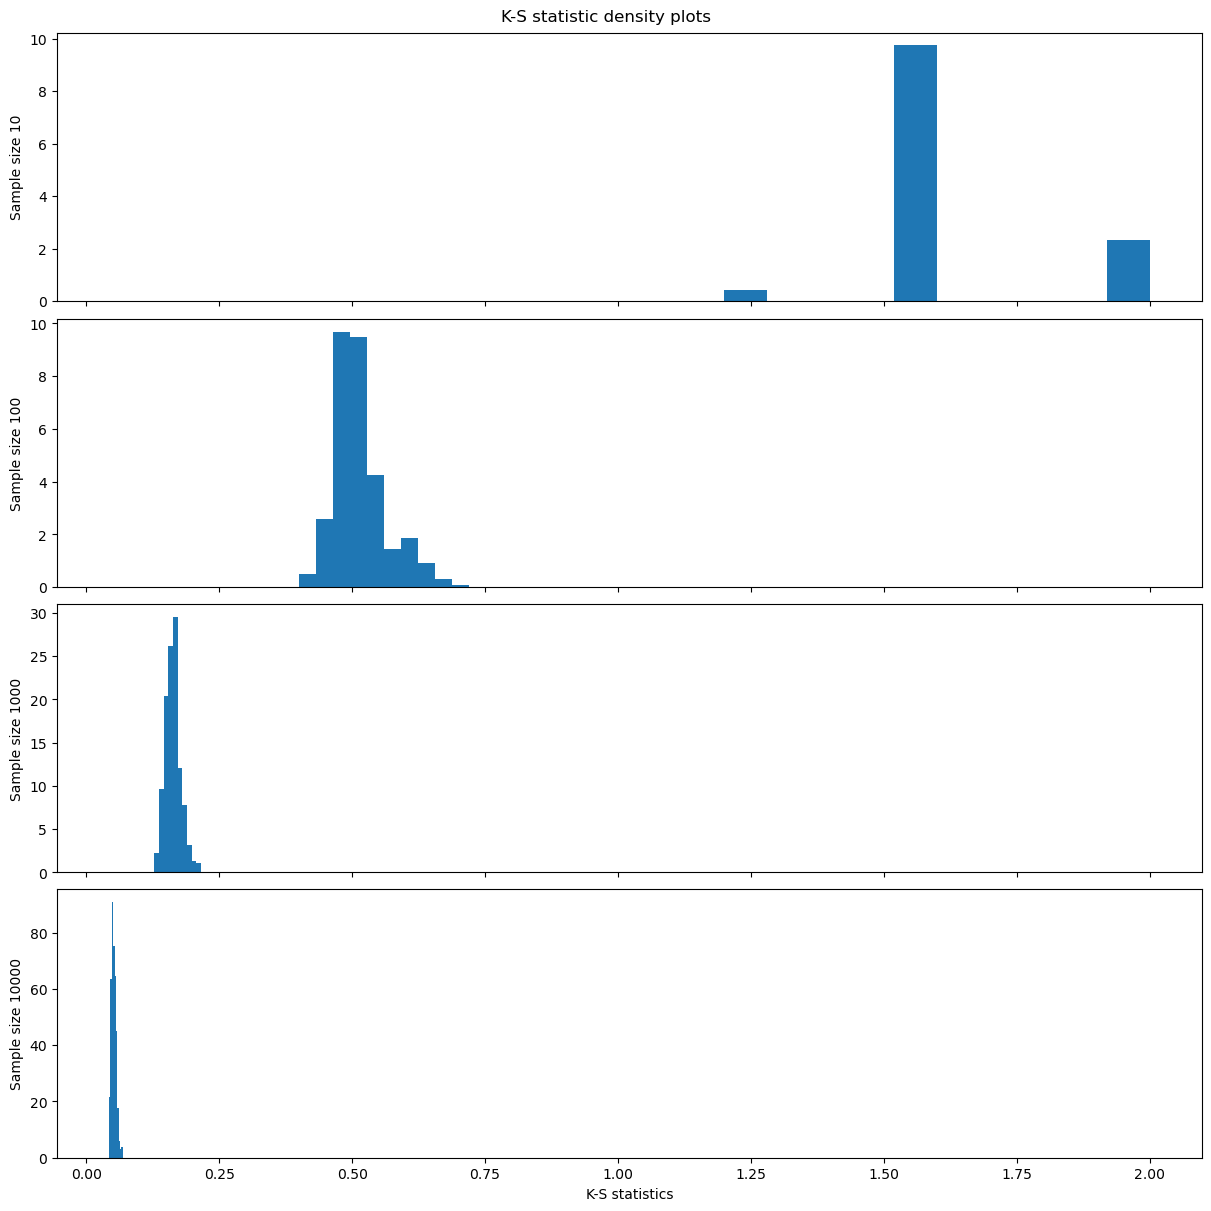

In [12]:
_ = test.plot_ks_sampling()

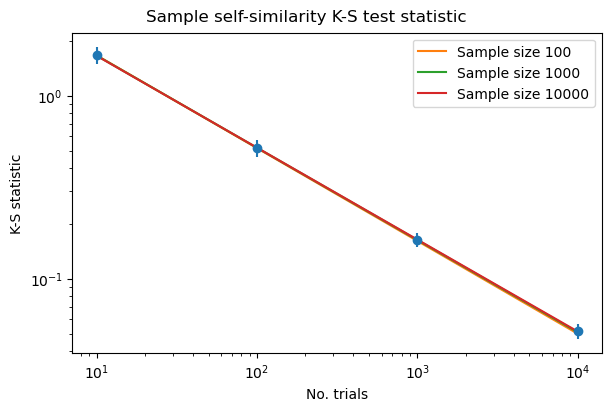

In [13]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()